In [1]:
from CONSTANTS import API_KEY, API_SECRET

In [ ]:
from delta_client import run_diagnostics
run_diagnostics(API_KEY, API_SECRET, minutes_back=30, verbose=True)


In [2]:
from delta_client import DeltaIndiaClient, DeltaAPIError
from datetime import datetime, timezone, timedelta
verbose = True
days_back = 90
minutes_back = days_back*24*60
client = DeltaIndiaClient(API_KEY, API_SECRET, verbose=verbose)

# Balances

balance_result = client.get_wallet_balances()
print(f"Balance results : {balance_result}")

# Time window
end_dt = datetime.now(timezone.utc)
start_dt = end_dt - timedelta(minutes=minutes_back)
start_us = int(start_dt.timestamp() * 1_000_000)
end_us = int(end_dt.timestamp() * 1_000_000)

# Wallet txns

wallet_txns_result = client.get_wallet_transactions(start_us=start_us, end_us=end_us, max_pages=2)
print(f"Wallet txns results : {wallet_txns_result}")


# Fills

fill_results = client.get_fills(start_us=start_us, end_us=end_us, max_pages=2)
print(f"Fill results : {fill_results}")   


[DeltaClient 2025-09-03 11:16:21] REQUEST GET /v2/wallet/balances | signed='GET1756878381/v2/wallet/balances'
[DeltaClient 2025-09-03 11:16:21] RESPONSE 200 for /v2/wallet/balances
[DeltaClient 2025-09-03 11:16:21] ✅ OK /v2/wallet/balances
[DeltaClient 2025-09-03 11:16:21] Balances count=1
Balance results : [{'asset_id': 14, 'asset_symbol': 'USD', 'available_balance': '14227.696707932703238702', 'available_balance_for_robo': '14227.69670793', 'available_balance_inr': '1209354.22', 'balance': '18909.43255184', 'balance_inr': '1607301.77', 'blocked_margin': '4681.735843907296761298', 'commission': '70.7517215972967613', 'cross_asset_liability': '0', 'cross_commission': '0', 'cross_locked_collateral': '0', 'cross_order_margin': '0', 'cross_position_margin': '0', 'id': 567972, 'interest_credit': '0', 'lien_amount': '0', 'order_margin': '0', 'pending_referral_bonus': '0', 'pending_trading_fee_credit': '0', 'portfolio_margin': '0', 'position_margin': '4610.984122309999999998', 'referral_bonu

In [3]:
wallet_txns_result

[{'amount': '0.86507881',
  'asset_id': 14,
  'asset_symbol': 'USD',
  'balance': '18909.43255184',
  'created_at': '2025-09-03T05:05:28.010068Z',
  'fund_id': None,
  'meta_data': {'product_symbol': 'BTCUSD'},
  'product_id': 27,
  'transaction_type': 'funding',
  'user_id': 78300923,
  'uuid': '9b1a74279ad449d583bf1248d5dff3ea'},
 {'amount': '-8.48574533',
  'asset_id': 14,
  'asset_symbol': 'USD',
  'balance': '18908.56747303',
  'created_at': '2025-09-03T04:23:42.794893Z',
  'fund_id': None,
  'meta_data': {'amount_without_gst': '-7.19130933',
   'fill_uuid': 'de90ad5654f44025a462a89cc30ae573',
   'gst': '-1.294436',
   'product_symbol': 'BTCUSD'},
  'product_id': 27,
  'transaction_type': 'commission',
  'user_id': 78300923,
  'uuid': 'e7b691779f564925a651868eab9277df'},
 {'amount': '-18.72625898',
  'asset_id': 14,
  'asset_symbol': 'USD',
  'balance': '18917.05321836',
  'created_at': '2025-09-03T04:23:42.641958Z',
  'fund_id': None,
  'meta_data': {'amount_without_gst': '-15.86

In [5]:
wallet_txns_result
type_txns = []
for txn in wallet_txns_result:
    print(txn['transaction_type'])
    type_txns.append(txn['transaction_type'])
    if txn['transaction_type'] == 'sub_account_transfer':
        print(txn)

len(set(type_txns)), set(type_txns)

funding
commission
commission
withdrawal
funding
commission
cashflow
commission
cashflow
commission
commission
commission
commission
sub_account_transfer
{'amount': '16470.59', 'asset_id': 14, 'asset_symbol': 'USD', 'balance': '23497.01543278', 'created_at': '2025-09-02T14:19:47.325854Z', 'fund_id': None, 'meta_data': {'transferee_id': 78300923, 'transferrer_id': 43064500}, 'product_id': None, 'transaction_type': 'sub_account_transfer', 'user_id': 78300923, 'uuid': '32c3e5dd7f3d4b378c41416c572eb312'}
funding
commission
cashflow
sub_account_transfer
{'amount': '-16470.59', 'asset_id': 14, 'asset_symbol': 'USD', 'balance': '6908.4424456', 'created_at': '2025-09-02T14:16:26.249150Z', 'fund_id': None, 'meta_data': {'transferee_id': 43064500, 'transferrer_id': 78300923}, 'product_id': None, 'transaction_type': 'sub_account_transfer', 'user_id': 78300923, 'uuid': '6d0891ae49214e2183697b04e42e9103'}
commission
funding
commission
cashflow
commission
cashflow
commission
cashflow
commission
cash

(7,
 {'cashflow',
  'commission',
  'deposit',
  'funding',
  'liquidation_fee',
  'sub_account_transfer',
  'withdrawal'})

In [7]:
from delta_txn_models import parse_all_txns, DeltaTxnBase, CashflowTxn

# rows = client.get_wallet_transactions(...)
txns = parse_all_txns(wallet_txns_result)

# Common fields via the base:
for t in txns:
    print(t.transaction_type, t.amount, t.asset_symbol, t.created_at_ist)

# Type-specific access (mypy-friendly if you check isinstance):
for t in txns:
    if isinstance(t, CashflowTxn):
        print("cashflow product:", t.product_symbol, "entry:", t.entry_price, "exit:", t.exit_price)


funding 0.86507881 USD 2025-09-03 10:35:28.010068+05:30
commission -8.48574533 USD 2025-09-03 09:53:42.794893+05:30
commission -18.72625898 USD 2025-09-03 09:53:42.641958+05:30
withdrawal -4705.88235295 USD 2025-09-02 20:25:07.959288+05:30
funding 1.30122484 USD 2025-09-02 20:21:55.327507+05:30
commission -4.20019584 USD 2025-09-02 20:21:55.223382+05:30
cashflow 9.91443046 USD 2025-09-02 20:21:55.223320+05:30
commission -143.98731641 USD 2025-09-02 20:21:55.209861+05:30
cashflow 340.97606953 USD 2025-09-02 20:21:55.209821+05:30
commission -2.6600976 USD 2025-09-02 20:03:30.109674+05:30
commission -23.0190624 USD 2025-09-02 20:03:30.101547+05:30
commission -0.02624993 USD 2025-09-02 19:51:47.139033+05:30
commission -33.65240514 USD 2025-09-02 19:51:47.131610+05:30
sub_account_transfer 16470.59 USD 2025-09-02 19:49:47.325854+05:30
funding -0.501658 USD 2025-09-02 19:49:10.998471+05:30
commission -83.76135482 USD 2025-09-02 19:49:10.551825+05:30
cashflow 202.246 USD 2025-09-02 19:49:10.55

In [8]:
txns

[FundingTxn(amount=Decimal('0.86507881'), asset_id=14, asset_symbol='USD', balance=Decimal('18909.43255184'), created_at=datetime.datetime(2025, 9, 3, 5, 5, 28, 10068, tzinfo=zoneinfo.ZoneInfo(key='UTC')), fund_id=None, product_id=27, transaction_type='funding', user_id=78300923, uuid='9b1a74279ad449d583bf1248d5dff3ea', meta_data={'product_symbol': 'BTCUSD'}, product_symbol='BTCUSD'),
 CommissionTxn(amount=Decimal('-8.48574533'), asset_id=14, asset_symbol='USD', balance=Decimal('18908.56747303'), created_at=datetime.datetime(2025, 9, 3, 4, 23, 42, 794893, tzinfo=zoneinfo.ZoneInfo(key='UTC')), fund_id=None, product_id=27, transaction_type='commission', user_id=78300923, uuid='e7b691779f564925a651868eab9277df', meta_data={'amount_without_gst': '-7.19130933', 'fill_uuid': 'de90ad5654f44025a462a89cc30ae573', 'gst': '-1.294436', 'product_symbol': 'BTCUSD'}, amount_without_gst=Decimal('-7.19130933'), gst=Decimal('-1.294436'), fill_uuid='de90ad5654f44025a462a89cc30ae573', product_symbol='BTCU

In [6]:
from collections import defaultdict

def inspect_txn_schemas(wallet_txns_result):
    grouped = defaultdict(list)
    for txn in wallet_txns_result:
        grouped[txn['transaction_type']].append(txn)

    for ttype, txns in grouped.items():
        print(f"\n=== {ttype} ({len(txns)} examples) ===")
        # collect union of keys across all txns of this type
        all_keys = set()
        for txn in txns:
            all_keys.update(txn.keys())
        print("Top-level keys:", all_keys)

        # show sample txn
        print("Sample txn:")
        for k, v in txns[0].items():
            if isinstance(v, dict):
                print(f"  {k}: dict with keys {list(v.keys())}")
            else:
                print(f"  {k}: {v}")
inspect_txn_schemas(wallet_txns_result)



=== funding (607 examples) ===
Top-level keys: {'created_at', 'uuid', 'balance', 'product_id', 'user_id', 'amount', 'fund_id', 'meta_data', 'transaction_type', 'asset_id', 'asset_symbol'}
Sample txn:
  amount: 0.86507881
  asset_id: 14
  asset_symbol: USD
  balance: 18909.43255184
  created_at: 2025-09-03T05:05:28.010068Z
  fund_id: None
  meta_data: dict with keys ['product_symbol']
  product_id: 27
  transaction_type: funding
  user_id: 78300923
  uuid: 9b1a74279ad449d583bf1248d5dff3ea

=== commission (206 examples) ===
Top-level keys: {'created_at', 'uuid', 'balance', 'product_id', 'user_id', 'amount', 'fund_id', 'meta_data', 'transaction_type', 'asset_id', 'asset_symbol'}
Sample txn:
  amount: -8.48574533
  asset_id: 14
  asset_symbol: USD
  balance: 18908.56747303
  created_at: 2025-09-03T04:23:42.794893Z
  fund_id: None
  meta_data: dict with keys ['amount_without_gst', 'fill_uuid', 'gst', 'product_symbol']
  product_id: 27
  transaction_type: commission
  user_id: 78300923
  uu

[DeltaClient 2025-09-02 23:37:48] REQUEST GET /v2/wallet/balances | signed='GET1756836468/v2/wallet/balances'
[DeltaClient 2025-09-02 23:37:48] RESPONSE 200 for /v2/wallet/balances
[DeltaClient 2025-09-02 23:37:48] ✅ OK /v2/wallet/balances
[DeltaClient 2025-09-02 23:37:48] Balances count=1
[DeltaClient 2025-09-02 23:37:48] REQUEST GET /v2/wallet/transactions?start_time=1725129000000000&end_time=1756836468369870&page_size=500 | signed='GET1756836468/v2/wallet/transactions?start_time=1725129000000000&end_time=1756836468369870&page_size=500'
[DeltaClient 2025-09-02 23:37:48] RESPONSE 200 for /v2/wallet/transactions
[DeltaClient 2025-09-02 23:37:48] ✅ OK /v2/wallet/transactions
[DeltaClient 2025-09-02 23:37:48] → paginate next after=g3QAAAACZAAKY3JlYXRlZF9hdHQAAAANZAAKX19zdHJ1Y3RfX2QAD0VsaXhpci5EYXRlVGltZWQACGNhbGVuZGFyZAATRWxpeGlyLkNhbGVuZGFyLklTT2QAA2RheWEaZAAEaG91cmEOZAALbWljcm9zZWNvbmRoAmIAB0i6YQZkAAZtaW51dGVhJmQABW1vbnRoYQhkAAZzZWNvbmRhJGQACnN0ZF9vZmZzZXRhAGQACXRpbWVfem9uZW0AAAAHRXRjL

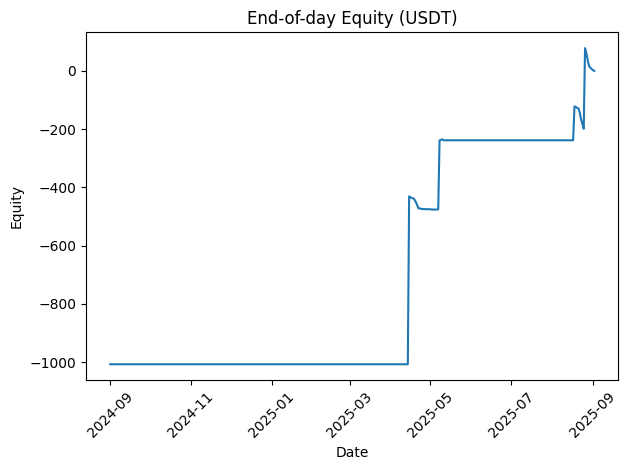

In [2]:
from utils_equity_series import fetch_daily_equity_series
from CONSTANTS import API_KEY, API_SECRET

df = fetch_daily_equity_series(
    api_key=API_KEY,
    api_secret=API_SECRET,
    start_date="2024-09-01",
    end_date="2025-09-02",
    base_ccy="USDT",
    verbose=True,   # prints request/signature logs from your working client
)

print(df.head())
#    date       equity
# 0  2025-07-01  1234.56
# 1  2025-07-02  1240.12
# ...

# Plot with matplotlib
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df["date"], df["equity"])
plt.title("End-of-day Equity (USDT)")
plt.xlabel("Date")
plt.ylabel("Equity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
from delta_txn_totals import fetch_totals
from CONSTANTS import API_KEY, API_SECRET

totals = fetch_totals(
    api_key=API_KEY,
    api_secret=API_SECRET,
    start_date="2023-08-01",
    end_date="2025-09-3",
    asset_symbol="USD",     # or None to include all assets
    verbose=True,
)

print(totals)
# {
#   'total_commission': -12.34,
#   'total_funding': 3.21,
#   'total_cashflow': 100.0,
#   'total_deposit': 50.0,
#   'count': 123,
#   'asset': 'USD',
#   'window_ist': '2025-08-01 .. 2025-08-29'
# }


[Totals 2025-09-03 00:02:56 ] Window IST: 2023-08-01 00:00:00+05:30 .. 2025-09-03 23:59:59+05:30
[Totals 2025-09-03 00:02:56 ] Window UTC: 2023-07-31 18:30:00+00:00 .. 2025-09-03 18:29:59+00:00
[Totals 2025-09-03 00:02:56 ] Micros: 1690828200000000 .. 1756924199000000
[DeltaClient 2025-09-03 00:02:56] REQUEST GET /v2/wallet/transactions?start_time=1690828200000000&end_time=1756924199000000&page_size=500 | signed='GET1756837976/v2/wallet/transactions?start_time=1690828200000000&end_time=1756924199000000&page_size=500'
[DeltaClient 2025-09-03 00:02:57] RESPONSE 200 for /v2/wallet/transactions
[DeltaClient 2025-09-03 00:02:57] ✅ OK /v2/wallet/transactions
[DeltaClient 2025-09-03 00:02:57] → paginate next after=g3QAAAACZAAKY3JlYXRlZF9hdHQAAAANZAAKX19zdHJ1Y3RfX2QAD0VsaXhpci5EYXRlVGltZWQACGNhbGVuZGFyZAATRWxpeGlyLkNhbGVuZGFyLklTT2QAA2RheWEaZAAEaG91cmEOZAALbWljcm9zZWNvbmRoAmIAB0i6YQZkAAZtaW51dGVhJmQABW1vbnRoYQhkAAZzZWNvbmRhJGQACnN0ZF9vZmZzZXRhAGQACXRpbWVfem9uZW0AAAAHRXRjL1VUQ2QACnV0Y19vZmZzZXR

In [3]:
# delta_simple_balances.py
from typing import List, Dict
from delta_client import DeltaIndiaClient

def get_balances(api_key: str, api_secret: str, verbose: bool = False) -> List[Dict[str, float]]:
    """
    Return a list of dicts with only 4 fields:
      - asset_symbol
      - balance
      - available_balance
      - blocked_margin
    """
    client = DeltaIndiaClient(api_key, api_secret, verbose=verbose)
    data = client.get_wallet_balances()  # -> list of dicts from API
    out = []
    for row in data or []:
        try:
            out.append({
                "asset_symbol": row.get("asset_symbol"),
                "balance": float(row.get("balance", 0)),
                "available_balance": float(row.get("available_balance", 0)),
                "blocked_margin": float(row.get("blocked_margin", 0)),
            })
        except Exception as e:
            if verbose:
                print(f"[Skip row error] {e} | row={row}")
    return out


# # --- quick test ---
# if __name__ == "__main__":
#     from CONSTANTS import API_KEY, API_SECRET
#     bals = get_simple_balances(API_KEY, API_SECRET, verbose=True)
#     for b in bals:
#         print(b)


In [16]:
bals

[Balance(asset='USD', equity=0.0, available_balance=18109.153922885886, margin_balance=None, wallet_balance=None, raw={'asset_id': 14, 'asset_symbol': 'USD', 'available_balance': '18109.153922885886081319', 'available_balance_for_robo': '18109.15392288', 'available_balance_inr': '1539278.08', 'balance': '21011.08018709', 'balance_inr': '1785941.82', 'blocked_margin': '2901.926264204113918681', 'commission': '0', 'cross_asset_liability': '0', 'cross_commission': '0', 'cross_locked_collateral': '0', 'cross_order_margin': '0', 'cross_position_margin': '0', 'id': 567972, 'interest_credit': '0', 'lien_amount': '0', 'order_margin': '0', 'pending_referral_bonus': '0', 'pending_trading_fee_credit': '0', 'portfolio_margin': '2901.926264204113918681', 'position_margin': '0', 'referral_bonus': '0', 'strategy_blocked_amount': '0', 'trading_fee_credit': '0', 'unvested_amount': '0', 'user_id': 78300923})]

In [5]:
client = DeltaIndiaClient(API_KEY, API_SECRET, verbose=True)
data = client.get_wallet_balances()

[DeltaClient 2025-09-05 11:48:30] REQUEST GET /v2/wallet/balances | signed='GET1757053110/v2/wallet/balances'
[DeltaClient 2025-09-05 11:48:30] RESPONSE 200 for /v2/wallet/balances
[DeltaClient 2025-09-05 11:48:30] ✅ OK /v2/wallet/balances
[DeltaClient 2025-09-05 11:48:30] Balances count=1


In [6]:
data

[{'asset_symbol': 'USD',
  'balance': 21011.08018709,
  'available_balance': 18141.602305099463,
  'blocked_margin': 2869.477881990539}]

In [ ]:
from CONSTANTS import API_KEY, API_SECRET
from delta_txn_totals import fetch_totals, daily_metrics_df

# Overall window totals
tot = fetch_totals(API_KEY, API_SECRET, "2025-09-01", "2025-09-05", asset_symbol="USD", verbose=True)
print(tot)

# Per-day breakdown (DataFrame)
df = daily_metrics_df(API_KEY, API_SECRET, "2025-09-01", "2025-09-05", asset_symbol="USD")
print(df.head())


[Totals 2025-09-05 13:43:02 ] Window IST: 2025-09-01 00:00:00+05:30 .. 2025-09-05 23:59:59+05:30
[Totals 2025-09-05 13:43:02 ] Window UTC: 2025-08-31 18:30:00+00:00 .. 2025-09-05 18:29:59+00:00
[Totals 2025-09-05 13:43:02 ] Micros: 1756665000000000 .. 1757096999000000
[DeltaClient 2025-09-05 13:43:02] REQUEST GET /v2/wallet/transactions?start_time=1756665000000000&end_time=1757096999000000&page_size=500 | signed='GET1757059982/v2/wallet/transactions?start_time=1756665000000000&end_time=1757096999000000&page_size=500'
[DeltaClient 2025-09-05 13:43:03] RESPONSE 200 for /v2/wallet/transactions
[DeltaClient 2025-09-05 13:43:03] ✅ OK /v2/wallet/transactions
[DeltaClient 2025-09-05 13:43:03] Wallet txns fetched=163
[Totals 2025-09-05 13:43:03 ] Fetched 163 wallet txns
[Totals 2025-09-05 13:43:03 ] Kept 163 after asset filter = USD
[Totals 2025-09-05 13:43:03 ] Totals: {'deposit': 0.0, 'withdrawal': 8235.29411766, 'transfer_in': 35364.71, 'transfer_out': 34835.3, 'cashflow': 11812.2319999, 'f

In [ ]:
from CONSTANTS import API_KEY, API_SECRET
from delta_txn_totals import fetch_metrics, metrics_df

# One call → both summary and daily:
out = fetch_metrics(API_KEY, API_SECRET, "2025-09-01", "2025-09-05", asset_symbol="USD", verbose=True)
print(out["summary"])
print(out["daily"][:3])  # first 3 days

# Or directly get a DataFrame for charts:
df, summary = metrics_df(API_KEY, API_SECRET, "2025-09-01", "2025-09-05", asset_symbol="USD")
print(summary)
print(df.head())


{'deposit': 0.0,
 'withdrawal': 8235.29411766,
 'transfer_in': 35364.71,
 'transfer_out': 34835.3,
 'cashflow': 11812.2319999,
 'funding': 33.89905841,
 'commission': 2057.78837391,
 'liquidation_fee': 0.0,
 'realized_pnl_core': 9788.3426844,
 'net_external': -7705.88411766,
 'equity_change_explained': 2082.45856674,
 'count': 163,
 'asset': 'USD',
 'window_ist': '2025-09-01 .. 2025-09-05'}